In [2]:
import pandas as pd


listings= pd.read_csv('Listings.csv',
                      encoding='iso-8859-1',
                      low_memory=False,
                     parse_dates=['host_since'])

In [3]:
#preview the listings data.

listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
#determine the datatypes of the data

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [5]:
#change the host_since column datatpye to datatime assuming parse_dates is not at the beginning.
listings['host_since']=pd.to_datetime(listings['host_since'])

In [6]:
#filter the listing data by paris, capturing only the underslisted columns.
paris_listings= (
    listings
    .query("city=='Paris'")
    .loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']])

In [7]:
#info on the filtered data.
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [8]:
#check for missing values.

paris_listings.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [9]:
#perform descriptive analysis.

paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [10]:
paris_listings.query('price==0').count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [11]:
paris_listings.query('accommodates==0').count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [12]:
paris_listings.query('accommodates==0 and price==0').count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

## PREPARE DATA FOR VISUALIZATION

In [13]:
paris_listings_neighbourhood=(
    paris_listings
    .groupby(['neighbourhood'])
    .mean('price')
    .sort_values('price'))

paris_listings_neighbourhood.head()

,accommodates,price
neighbourhood,,
Menilmontant,2.918574,74.942257
Buttes-Chaumont,2.984710,82.690182
Buttes-Montmartre,2.848280,87.209479
Reuilly,3.002638,89.058402
Popincourt,2.916371,90.559459


In [14]:
#determine neighbourhood with the least price
paris_listings_neighbourhood=(
    paris_listings
    .groupby('neighbourhood')
    .agg({'price':'mean'})
    .sort_values('price'))
paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [15]:
#determine neighbourhood with the highest price
paris_listings_neighbourhood=(
    paris_listings
    .groupby('neighbourhood')
    .agg({'price':'mean'})
    .sort_values('price'))
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [16]:
paris_listings_accomodates=(paris_listings
                              .query("neighbourhood=='Elysee'")
                              .groupby('accommodates')
                              .agg({'price':'mean'})
                              .sort_values('price'))

paris_listings_accomodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [17]:
paris_listings_overtime=(
    paris_listings
    .set_index('host_since')
    .resample('Y')
    .agg({
        'neighbourhood':'count', 
          'price':'mean'
    })
)

paris_listings_overtime.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


## VISUALISE THE DATA 

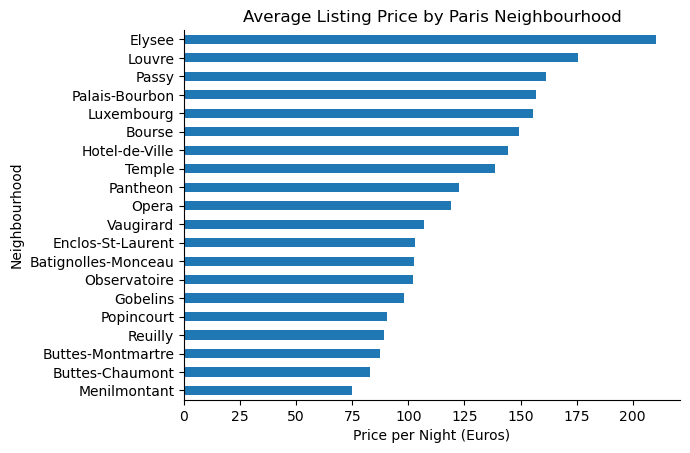

In [18]:
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
     title='Average Listing Price by Paris Neighbourhood',
     xlabel='Price per Night (Euros)',
     ylabel='Neighbourhood',
     legend=None
 )

)

sns.despine()
 

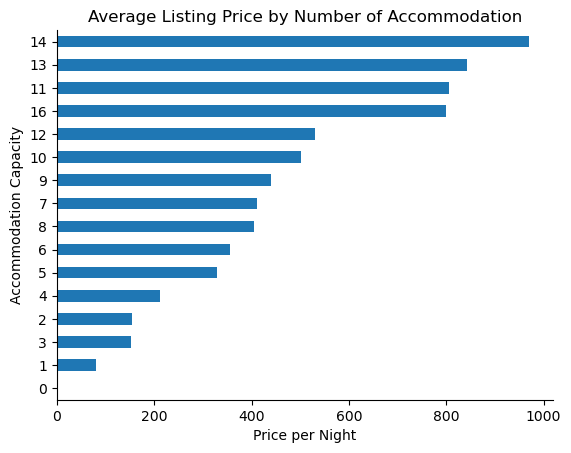

In [19]:

(paris_listings_accomodates
 .plot
 .barh(
     title='Average Listing Price by Number of Accommodation',
     xlabel='Price per Night',
     ylabel='Accommodation Capacity',
     legend=None
 )

)

sns.despine()

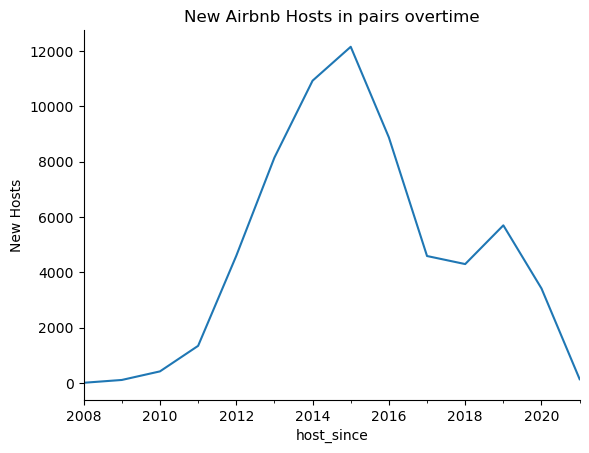

In [20]:
(paris_listings_overtime['neighbourhood']
 .plot(
     ylabel='New Hosts',
     title='New Airbnb Hosts in pairs overtime'
))
 
sns.despine()

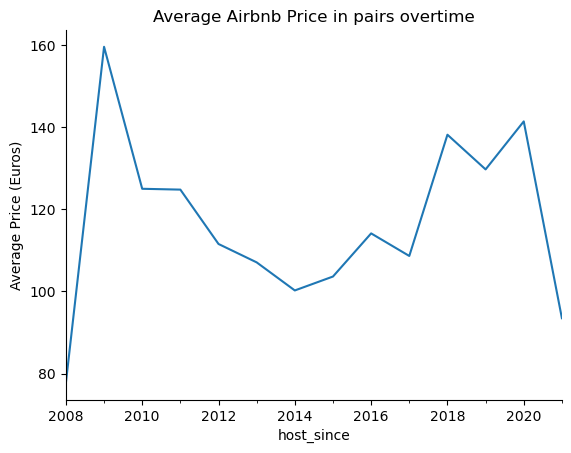

In [21]:
(paris_listings_overtime['price']
 .plot(
     ylabel='Average Price (Euros)',
     title='Average Airbnb Price in pairs overtime'
))
 
sns.despine()

Text(0.5, 1.0, '2015 regulations Lead to Fewer New Hosts, Higher Prices')

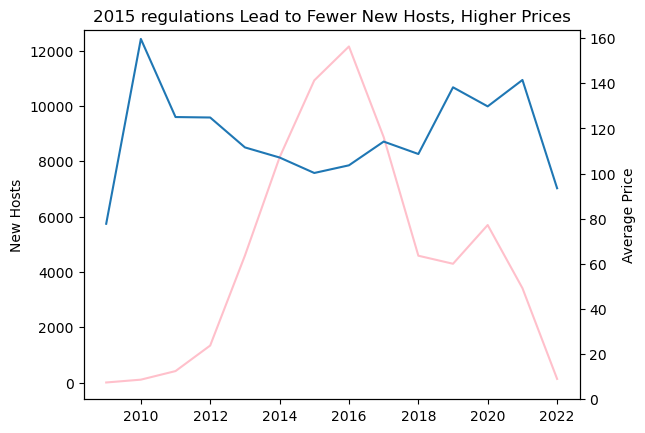

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot( 
    paris_listings_overtime.index, 
    paris_listings_overtime["neighbourhood"],
    label="New Hosts", 
    c="pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot( 
    paris_listings_overtime.index, 
    paris_listings_overtime["price"],
    label="Average Price",
)

ax2.set_ylim(0)

ax2.set_ylabel('Average Price')

ax.set_title('2015 regulations Lead to Fewer New Hosts, Higher Prices')